In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm  # colormaps

%matplotlib inline

In [3]:
from keras.datasets import cifar10
(cx_train, cy_train),(cx_test, cy_test) = cifar10.load_data()
print(cx_train.shape)
print(cy_train.shape)

Using TensorFlow backend.


(50000, 32, 32, 3)
(50000, 1)


In [4]:
def plot_colour_images(images_to_plot, titles=None, ncols=6, thefigsize=(18,18)):
    
    n_images = images_to_plot.shape[0]
    
    nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten()

    for i in range(n_images):
        ax[i].imshow( images_to_plot[i,:,:,:]) 
            # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[i].axis('off')  
        if titles is not None:
            ax[i].set_title(titles[i])

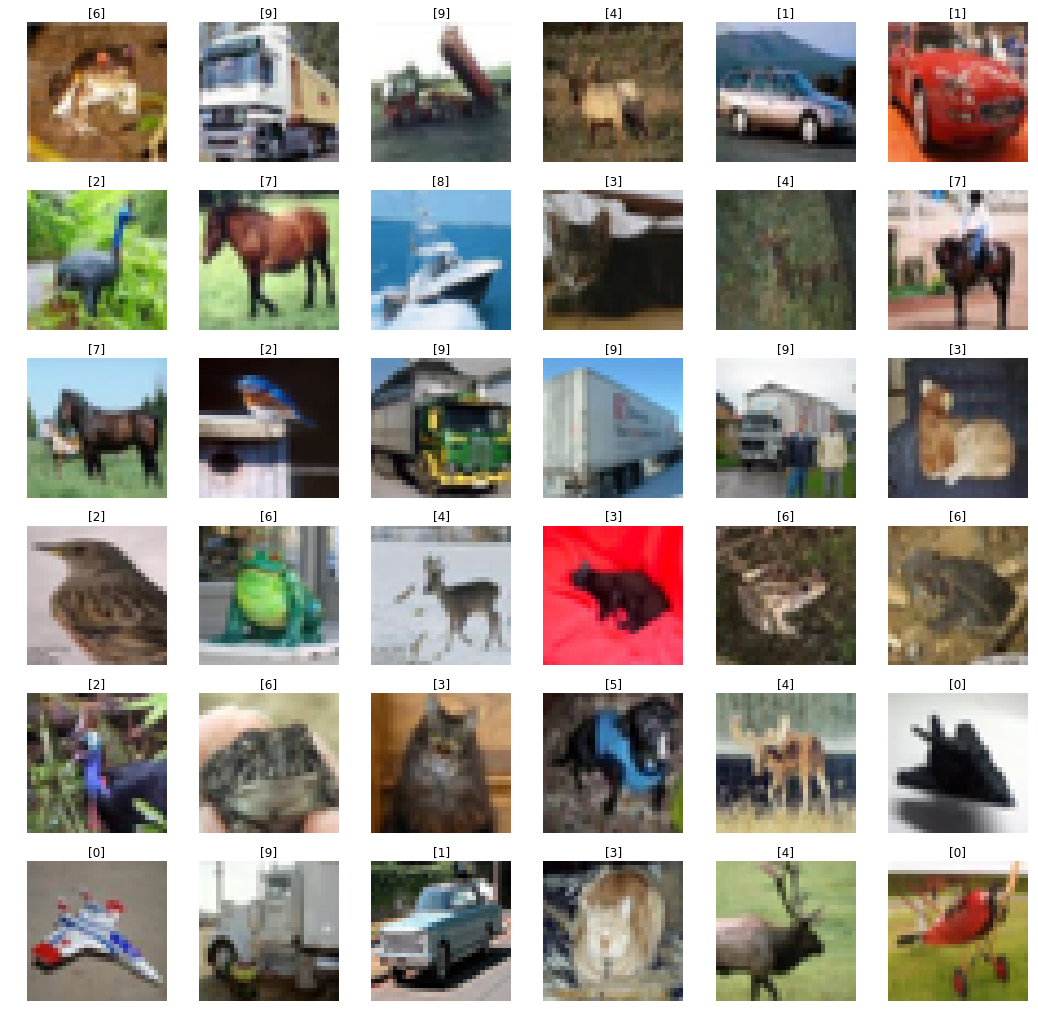

In [5]:
plot_colour_images( cx_train[:36,:,:], ncols=6,titles= cy_train[:36])

In [6]:
from keras import layers
from keras import models

#Convolutional layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
#classification layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
__________

In [8]:
# we need to reshape the training data to have 4D, since we want each digit to be read as an image
# with only one colour channel

cx_train = cx_train.reshape(cx_train.shape)
cx_test = cx_test.reshape(cx_test.shape)

cx_train.shape, cx_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [9]:
# to use softmax, we need to alter the class representations from integers to 'one-hot' 
from keras.utils.np_utils import to_categorical
cy_train_one_hot = to_categorical(cy_train)
cy_test_one_hot = to_categorical(cy_test)
cy_train_one_hot.shape, cy_test_one_hot.shape

((50000, 10), (10000, 10))

In [10]:
train_size = 4000

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(cx_train[:train_size], cy_train_one_hot[:train_size,:], epochs=5, batch_size=64)

Epoch 1/5
4000/4000 [==============================] - 5s 1ms/step - loss: 14.5276 - acc: 0.0970
Epoch 2/5
4000/4000 [==============================] - 5s 1ms/step - loss: 14.5345 - acc: 0.0983
Epoch 3/5
4000/4000 [==============================] - 5s 1ms/step - loss: 14.5345 - acc: 0.0983
Epoch 4/5
4000/4000 [==============================] - 5s 1ms/step - loss: 14.5345 - acc: 0.0983
Epoch 5/5
4000/4000 [==============================] - 5s 1ms/step - loss: 14.5345 - acc: 0.0983


In [12]:
history.history

{'loss': [14.52757015991211,
  14.534492446899414,
  14.534492294311523,
  14.534492347717284,
  14.534492301940919],
 'acc': [0.097, 0.09825, 0.09825, 0.09825, 0.09825]}

In [13]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d_1': <keras.layers.convolutional.Conv2D at 0x139ba2c18>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x13921e8d0>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x113836cc0>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x139ba2048>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x139ba2630>,
 'flatten_1': <keras.layers.core.Flatten at 0x139b556a0>,
 'dense_1': <keras.layers.core.Dense at 0x139b554a8>,
 'dense_2': <keras.layers.core.Dense at 0x139b55358>}

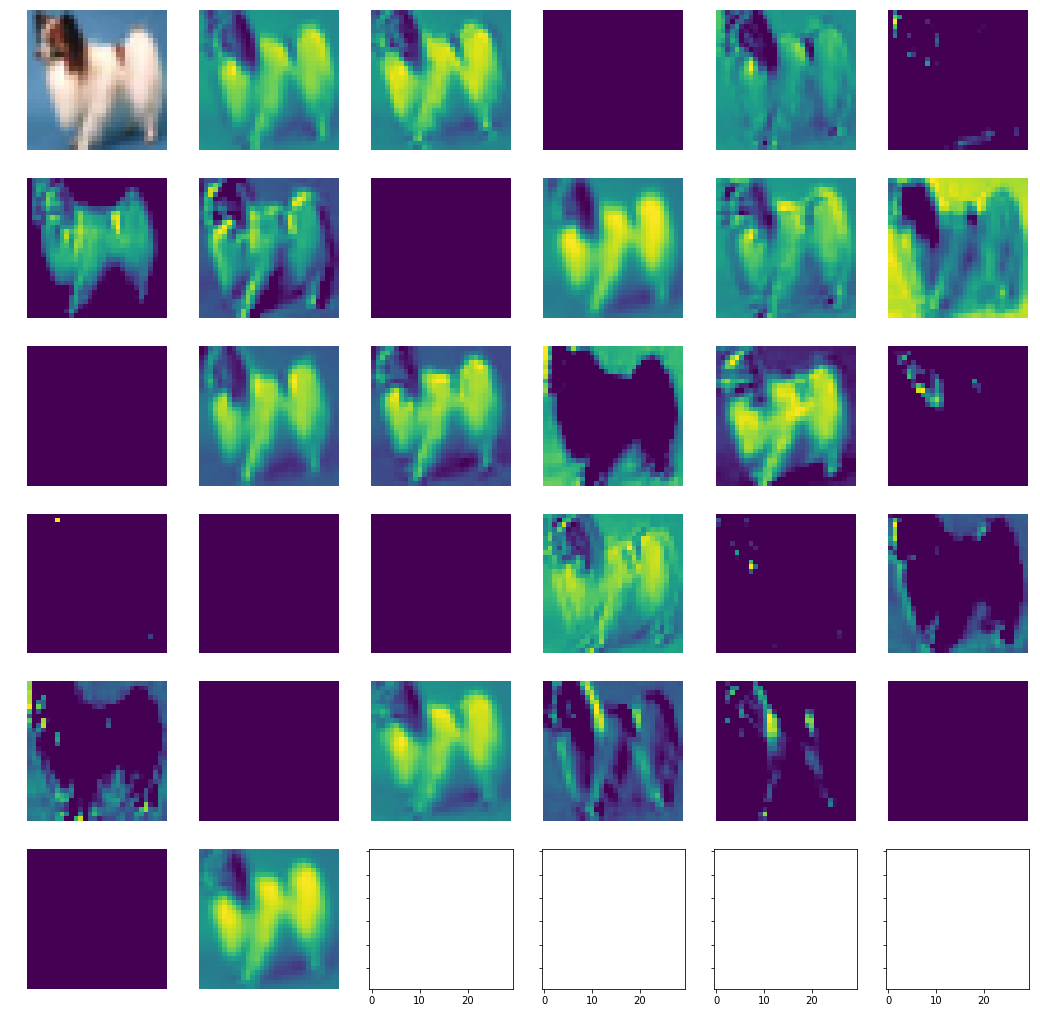

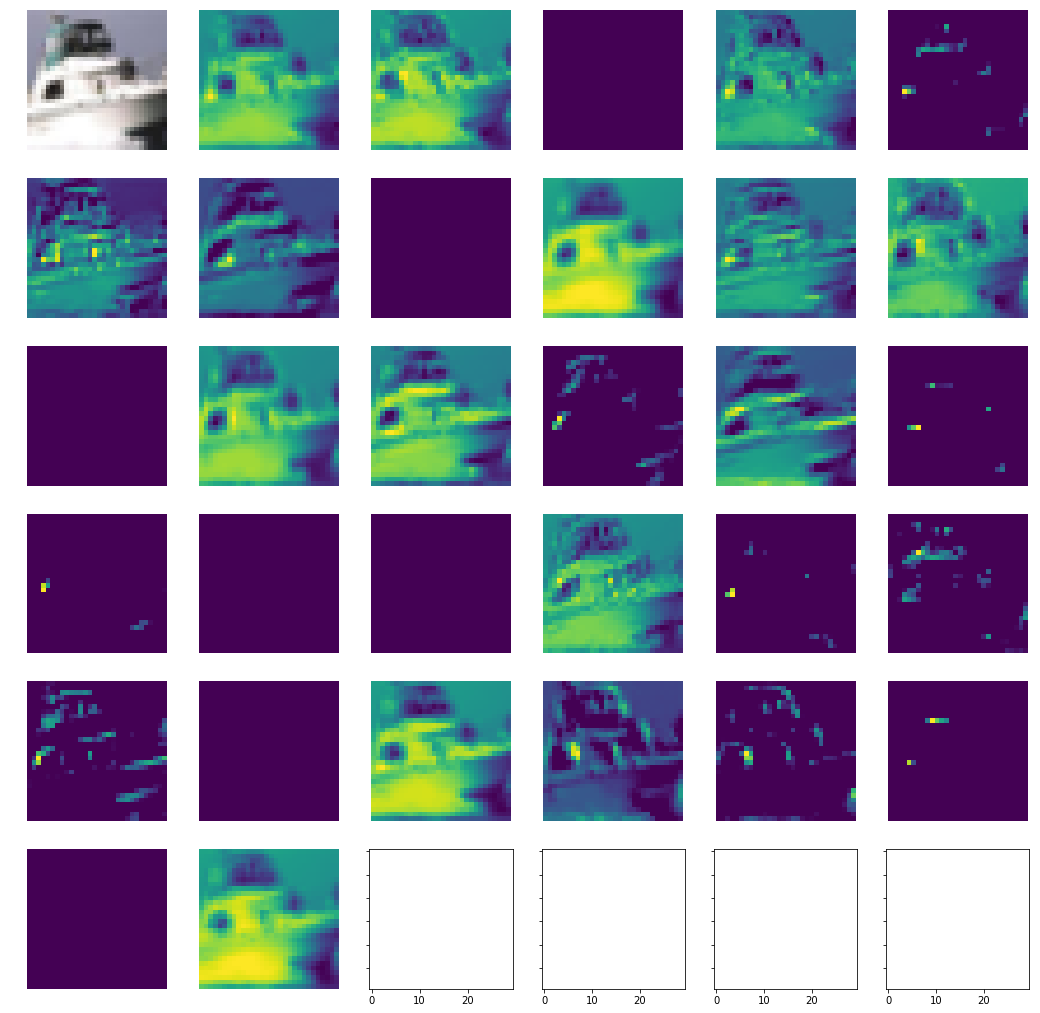

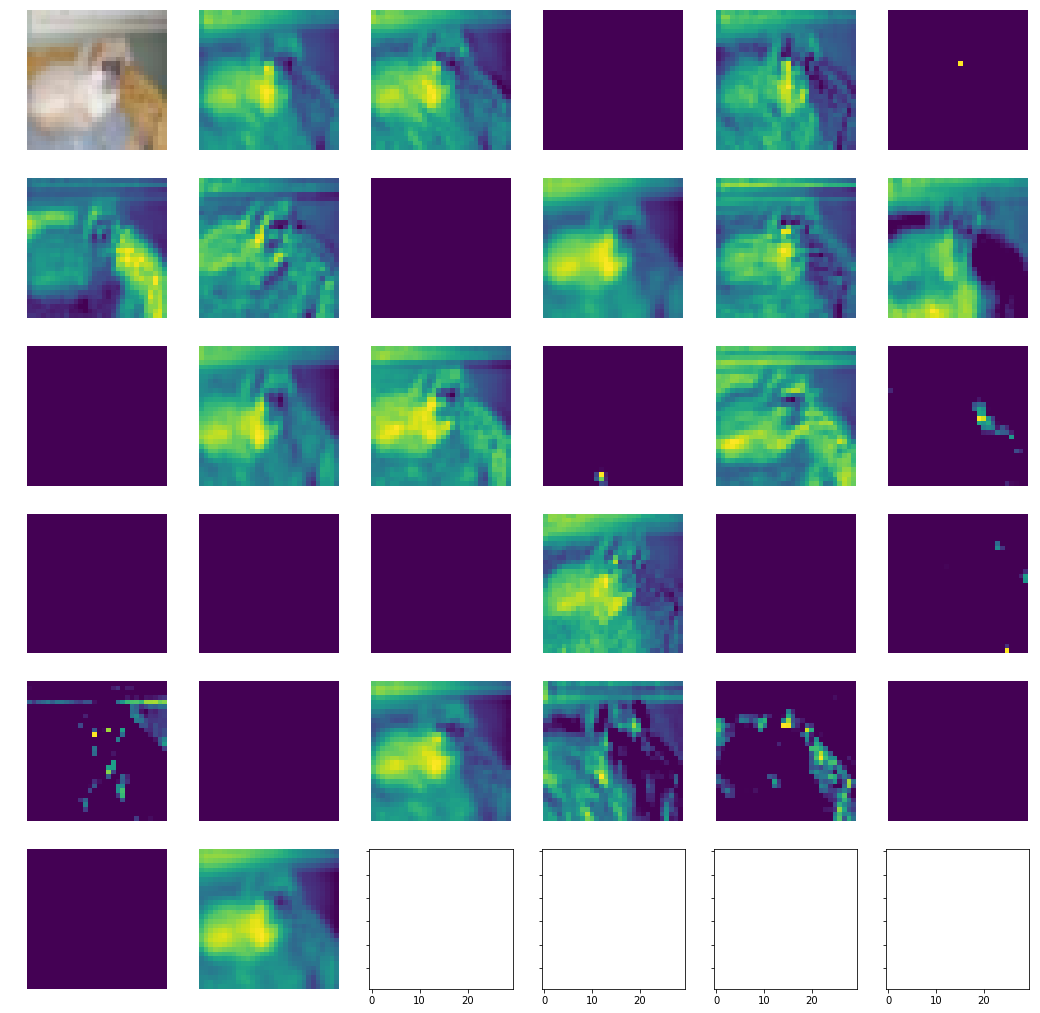

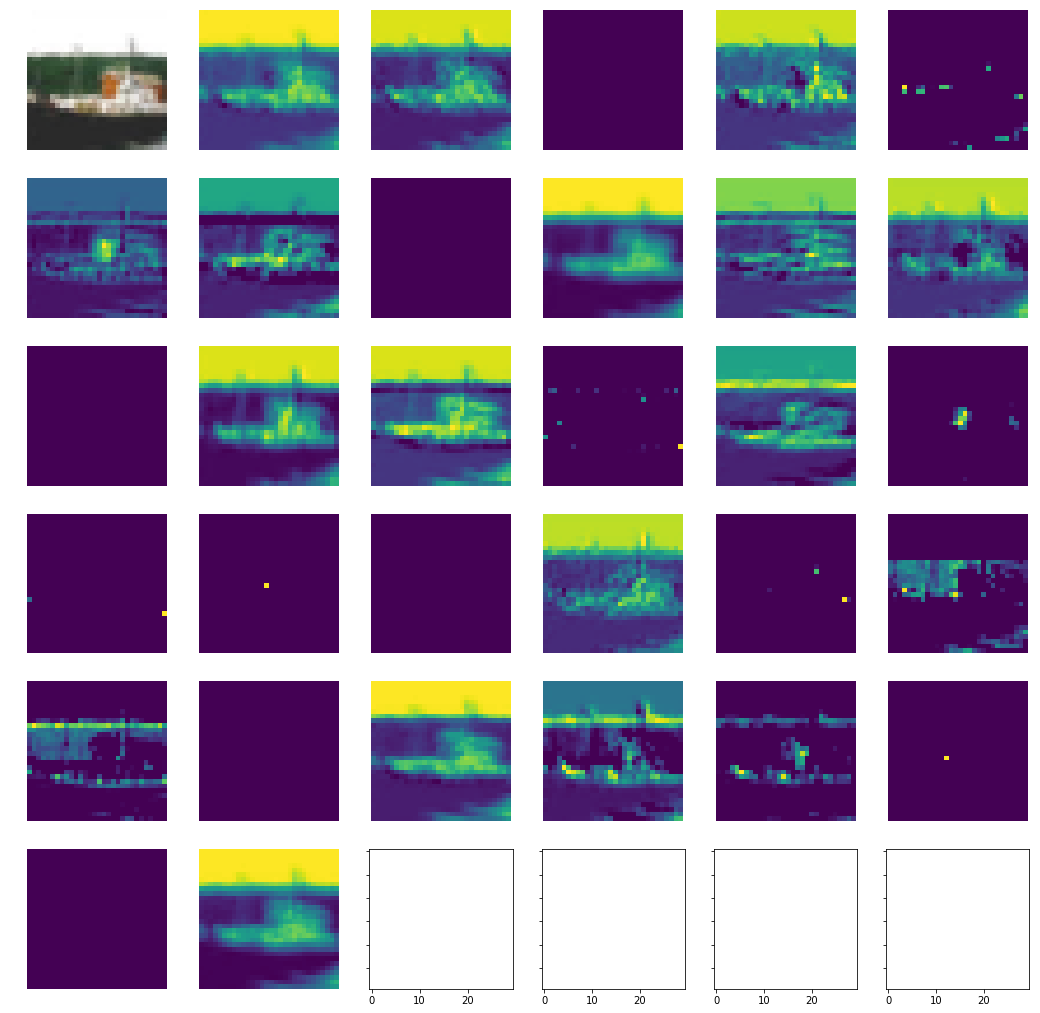

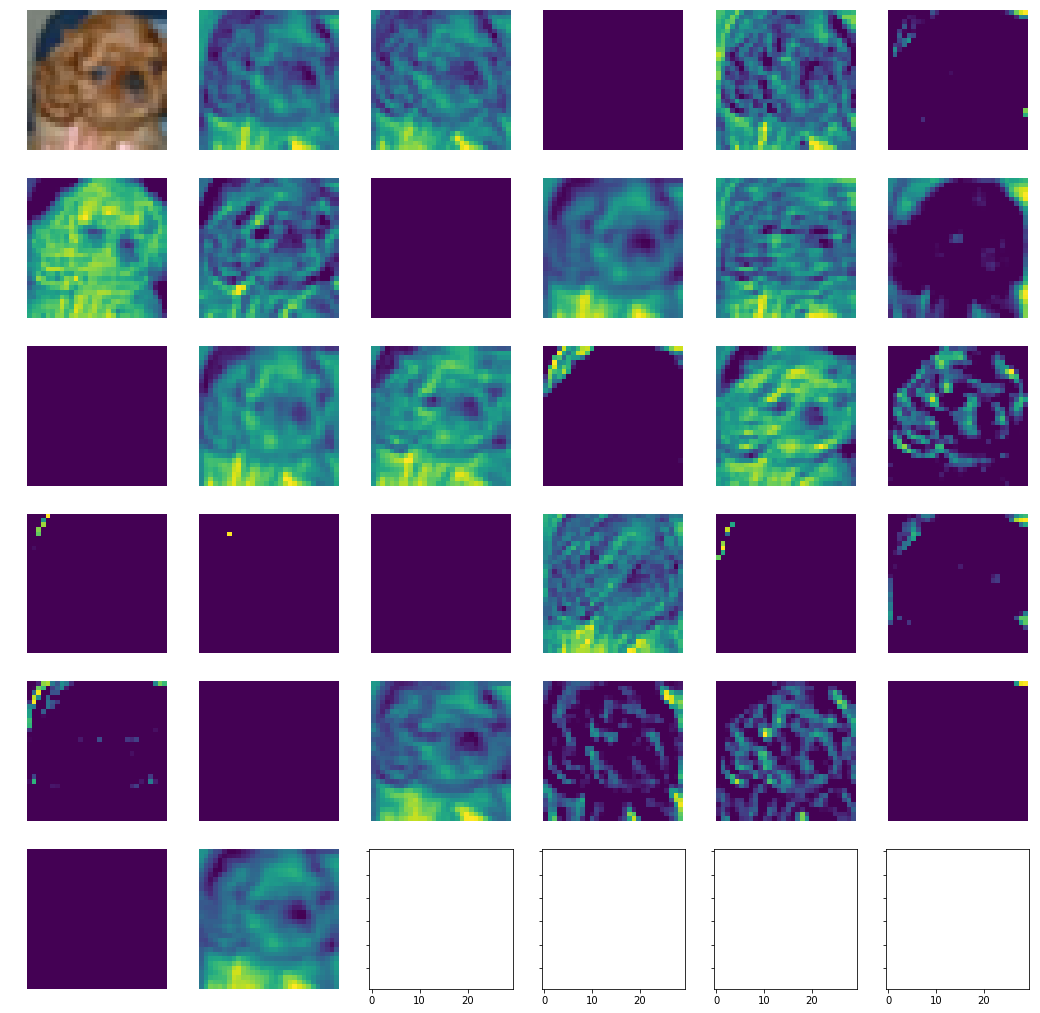

In [76]:
model_1 = models.Sequential()
model_1.add(layer_dict['conv2d_1'])
conv_img_pred = [] 

for i in range(4000,4005):
    fig,ax = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(18,18))
    ax = ax.flatten()
    
    image = cx_train[i:i+1,:,:]
    
    ax[0].imshow(cx_train[i:i+1,:,:].reshape(32,32,3))
    ax[0].axis('off') 
    
    conv_images = np.squeeze(model_1.predict(image), axis=0)
    
    
    for j in range(1, conv_images.shape[2]):
        ax[j].imshow(conv_images[:,:,j]) 
        # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[j].axis('off')  
    avg_img = np.sum(conv_images, axis=2)/32
    ax[j].imshow(avg_img) 
    ax[j].axis('off') 
        
        
        

In [20]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d_1': <keras.layers.convolutional.Conv2D at 0x13d218160>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x13d22b1d0>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x13d22b7f0>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x13d218630>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x13d218b70>,
 'flatten_1': <keras.layers.core.Flatten at 0x13d1ed748>,
 'dense_1': <keras.layers.core.Dense at 0x13d1ede48>,
 'dense_2': <keras.layers.core.Dense at 0x13d1edd68>}

In [85]:
conv2d_1_output = layer_dict['conv2d_1'].output
conv2d_1_output[0][:,:,0].float_val

AttributeError: 'Tensor' object has no attribute 'float_val'

In [82]:
#Convert tensorflow to numpy array
import tensorflow as tf
ph = tf.placeholder(tf.float32, shape=(30, 30))
def convert_to_nparray(tensor):
    type(tensor)
    with tf.Session() as sess:
        array = tensor.eval(sess)
        print (array)

In [84]:
convert_to_nparray(conv2d_1_output[0][:,:,0])

TypeError: input must be a dictionary

In [ ]:
from keras import backend as K

In [59]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = deprocess_image(conv2d_1_output[0])
print(img)
#imsave('%s_filter_%d.png' % (layer_name, filter_index), img)

AttributeError: 'Tensor' object has no attribute 'mean'